In [1]:
from zipfile import ZipFile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from kraken import pageseg

# face detection classifier
face_cascade = cv.CascadeClassifier('classifiers/haarcascade_frontalface_default.xml')

In [2]:
USE_TEST_ZIP_FILE = True
LARGE_ZIP_PATH = 'images/images.zip'
SMALL_ZIP_PATH = 'images/small_img.zip'

if USE_TEST_ZIP_FILE:
    ZIP_PATH = SMALL_ZIP_PATH
else:
    ZIP_PATH = LARGE_ZIP_PATH

## Extract Images from Zip File

First we write a function that will convert a zip file of images to a dictionary of pages.

In [10]:
class page:
    """page class for representing newspaper page image
    """
    def __init__(self, filename, image_object):
        self.fname = filename
        self.img = image_object

    def __str__(self):
        state = 'Filename: {}'.format(self.fname)
        return state
    
    def display_image(self):
        display(self.img)
        
    def recognize_text(self):
        """Convert image to binarised, segment using kraken and view boxes
        """
        bounding_boxes = pageseg.segment(self.img.convert('1'))['boxes']
        return bounding_boxes

    def show_boxes(img):
        '''Modifies the passed image to show a series of bounding boxes on an image as run by kraken

        :param img: A PIL.Image object
        :return img: The modified PIL.Image object
        '''
        # Lets bring in our ImageDraw object
        from PIL import ImageDraw
        # And grab a drawing object to annotate that image
        drawing_object=ImageDraw.Draw(img)
        # We can create a set of boxes using pageseg.segment
        bounding_boxes=pageseg.segment(img.convert('1'), black_colseps=True)['boxes']
        # Now lets go through the list of bounding boxes
        for box in bounding_boxes:
            # An just draw a nice rectangle
            drawing_object.rectangle(box, fill = None, outline ='red')
        # And to make it easy, lets return the image object
        return img

## Create newspaper: a list of instances of the page class

In [13]:
newspaper = [page(info_obj.filename, Image.open(ZipFile(ZIP_PATH).open(info_obj))) \
    for info_obj in ZipFile(ZIP_PATH).infolist()]

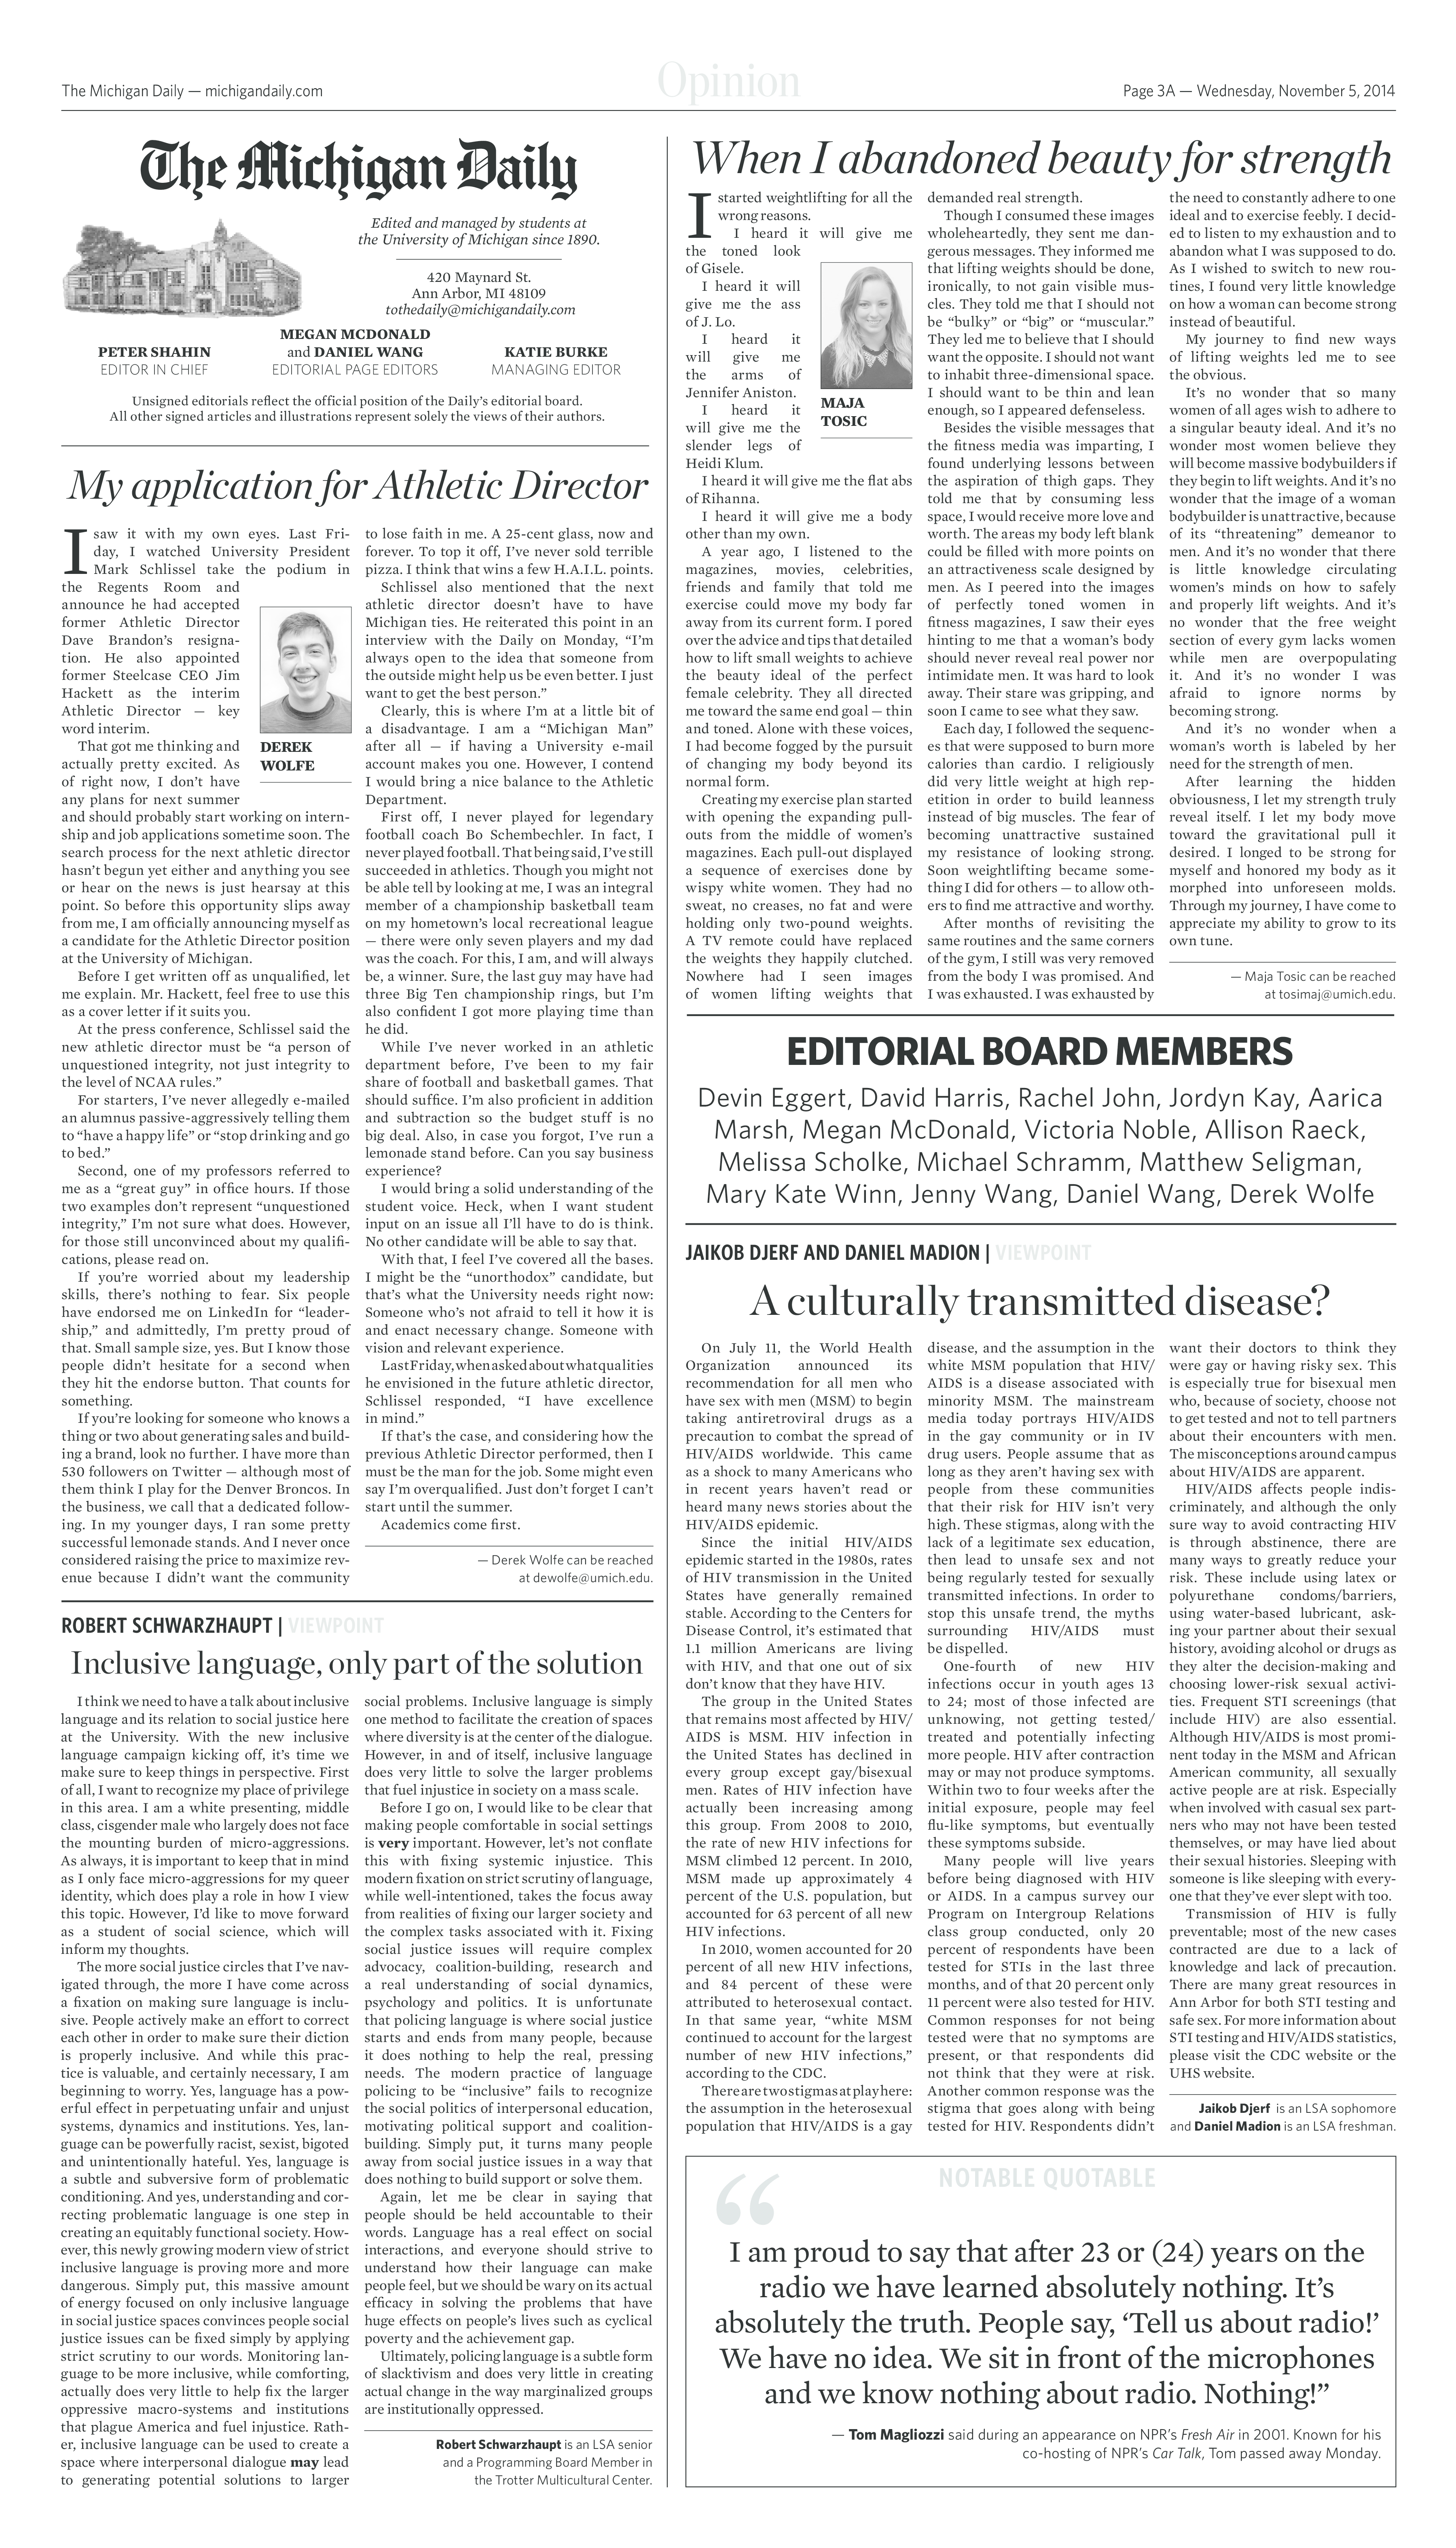

In [15]:
newspaper[2].display_image()

Next, we run the function over our zip file and create the newspaper dictionary.

## OCR

Next, let's throw a page at Kraken's pageseg function using a binarized image and display the boxes on the original image to judge the effectiveness. Since we are looking at newspaper pages with columns, we input the black_colseps parameter of pageseg as True.

In [ ]:
## Alternate Approaches

In [ ]:
# Define a class Page that has the following properties:
# - name (str)
# - faces (list)
# - keywords (list)

# and the following methods:
# - detect_faces
# - recognize_characters
# - make_contact_sheet

In [ ]:
# Define a function search_pages() that accepts a zip file and a string.
# The function first runs read_zip and instantiates one instance of Page 
# per page, and keeps these instances in an array.
# 

In [ ]:
p1 = page('test')

In [ ]:
print(p1)